<a href="https://colab.research.google.com/github/cecortesp/logica_difusa/blob/main/LD_TPF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sistema de riego con lógica difusa

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Librerías

In [ ]:
from turtle import bgcolor
import numpy as np
from matplotlib import pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control
#import os

Universo discurso
Vectores con los límites de entrada

In [ ]:
hum_ambiente_x = np.arange(0, 100, 1) # dominio humedad ambiente [1..100] -- ux
temp_ambiente_x = np.arange(-40, 100, 1) # dominio temperatura ambiente -- uy
hum_suelo_x = np.arange(0, 1023, 1) # dominio humedad del suelo -- uz
nivel_agua_x = np.arange(2, 99, 1) # dominio del nivel del agua

flujo_agua_x = np.arange(0, 31, 1) # dominio de flujo de agua

Variables de entrada

In [ ]:
hum_ambiente = control.Antecedent(hum_ambiente_x,'Humedad ambiente')
temp_ambiente = control.Antecedent(temp_ambiente_x,'Temperatura ambiente')
hum_suelo = control.Antecedent(hum_suelo_x,'Humedad suelo')
nivel_agua = control.Antecedent(nivel_agua_x, 'Nivel agua')

flujo_agua = control.Consequent(flujo_agua_x,'Flujo agua')

Funciones de pertenencia con las variables de entrada.


In [ ]:
hum_ambiente['seco'] = fuzz.trapmf(hum_ambiente_x, [0, 0, 20, 40])
hum_ambiente['normal'] = fuzz.trimf(hum_ambiente_x, [30, 55, 80])
hum_ambiente['humedo'] = fuzz.trapmf(hum_ambiente_x, [70, 90, 100, 100])


temp_ambiente['frio'] = fuzz.trapmf(temp_ambiente_x, [-40, -40, 10, 20])
temp_ambiente['templado'] = fuzz.trimf(temp_ambiente_x, [10, 25, 40])
temp_ambiente['caluroso'] = fuzz.trapmf(temp_ambiente_x, [30, 40, 100, 100])

hum_suelo['saturado'] = fuzz.trapmf(hum_suelo_x, [0, 0, 200, 400])
hum_suelo['humedo'] = fuzz.trimf(hum_suelo_x, [300, 550, 800])
hum_suelo['seco'] = fuzz.trapmf(hum_suelo_x, [700, 900, 1023, 1023])

nivel_agua['lleno'] = fuzz.trapmf(nivel_agua_x, [1, 1, 60, 80])
nivel_agua['vacio'] = fuzz.trapmf(nivel_agua_x, [60, 80, 100, 100])

flujo_agua['no'] = fuzz.sigmf(flujo_agua_x, 15, -1)
flujo_agua['si'] = fuzz.sigmf(flujo_agua_x, 15, 1)

Visualización de las funciones de pertenencia de las variables

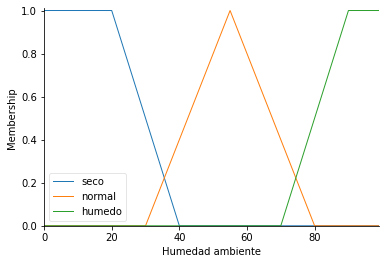

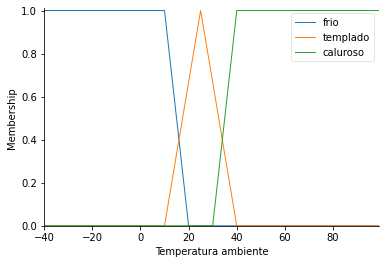

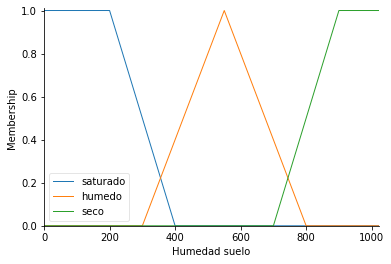

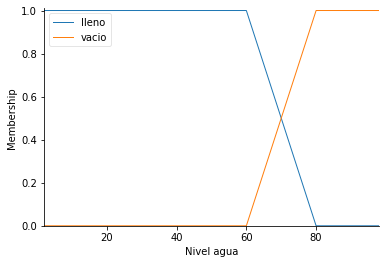

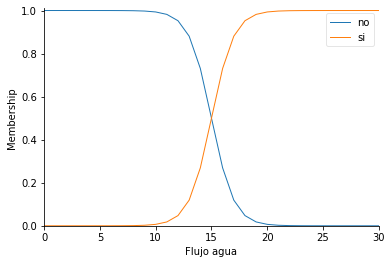

In [ ]:
hum_ambiente.view()
temp_ambiente.view()
hum_suelo.view()
nivel_agua.view()

flujo_agua.view()

Reglas

In [ ]:
regla1 = control.Rule(hum_ambiente['seco'] & temp_ambiente['caluroso'] & hum_suelo['seco'], flujo_agua['si'])
regla2 = control.Rule(hum_ambiente['seco'] & temp_ambiente['templado'] & hum_suelo['seco'], flujo_agua['si'])
regla3 = control.Rule(hum_suelo['saturado'], flujo_agua['no'])
regla4 = control.Rule(hum_suelo['seco'], flujo_agua['si'])
regla5 = control.Rule(hum_ambiente['seco'] & temp_ambiente['caluroso'] & hum_suelo['humedo'], flujo_agua['si'])
regla6 = control.Rule(hum_ambiente['seco'] & temp_ambiente['templado'] & hum_suelo['humedo'], flujo_agua['si'])
regla7 = control.Rule(hum_ambiente['seco'] & temp_ambiente['frio'] & hum_suelo['humedo'], flujo_agua['si'])
regla8 = control.Rule(hum_suelo['humedo'], flujo_agua['si'])
regla9 = control.Rule(nivel_agua['lleno'], flujo_agua['si'])
regla10 = control.Rule(nivel_agua['vacio'], flujo_agua['no'])

Sistema

In [ ]:
SE_control = control.ControlSystem([regla1,regla2,regla3,regla4,regla5,regla6,regla7,regla8,regla9,regla10])
SE = control.ControlSystemSimulation(SE_control)

Valores de entrada y salida

15.748440959771036


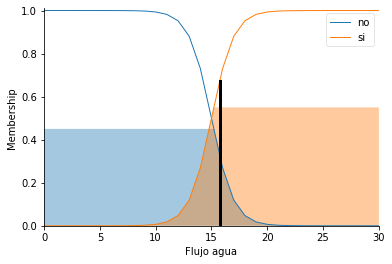

In [ ]:
SE.input['Humedad suelo']=350
SE.input['Temperatura ambiente']=10
SE.input['Humedad ambiente']=22
SE.input['Nivel agua']=69

SE.compute()
print (SE.output['Flujo agua'])
flujo_agua.view(sim=SE)


12.791375107101839


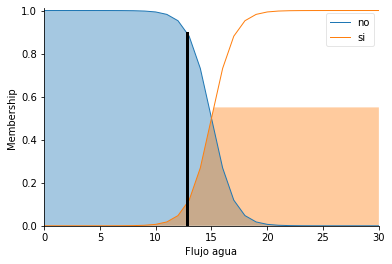

In [ ]:
SE.input['Humedad suelo']=200
SE.input['Temperatura ambiente']=30
SE.input['Humedad ambiente']=60
SE.input['Nivel agua']=69

SE.compute()
print (SE.output['Flujo agua'])
flujo_agua.view(sim=SE)